### K-Means Algorithm

K-Means 演算法是非監督的分群演算法，因為實作相對簡單，分群效果也不錯，因此其應用廣泛。
K-Means 的概念很簡單，對於給定的樣本集，按照樣本之間的距離大小，將樣本集劃分為 K 個群集。讓群集內的點盡量緊密的連在一起，而讓群集間的距離盡量的變大。如果用數學表達式表示，假設群集劃分為(C1,C2,...Ck)，則我們的目標是最小化平方誤差 E。

1. 先確定資料集群集個數 K。
2. 在資料集中隨機選取 K 個資料，作為初始質心(Centroid)。
3. 計算資料集中每個樣本到每個質心的距離，把樣本劃分到距離最小的質心所屬的群集。
4. 根據分群結果重新計算質心。當本次計算的核心與上一次質心完全一樣（或者收斂）時，停止迭代。

In [2]:
import random as rd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time
from IPython.display import clear_output
# import numpy as np

設定空間, 樣本點與群集數

其他參數:
- max_iter: 最大迭代次數
- n_init: 使用 n 組不同初始質心的運算次數, 最後採用最好的結果

In [3]:
NUMBER_OF_POINTS = 200
NUMBER_OF_K = 5
ITER_MAX = 999

iter_times = 0

# Manhattan Distance by NumPy
# E.g. a = np.array([1, 2]), b = np.array([4, 5])
# def manhattan_distance(a, b):
#     return np.sum(np.abs(a-b))

# Manhattan Distance by Python
def mht_dist(x1,y1,x2,y2):
    return round(abs(x1-x2) + abs(y1-y2), 2)

def setup(NUMBER_OF_POINTS, NUMBER_OF_K):
    x, y = [], []
    kx, ky = [], []
    plt.rcParams["figure.figsize"] = (6,6)
    for i in range(NUMBER_OF_POINTS):
        if i < NUMBER_OF_K:
            # 設定起始 K 個質心位置
            kx_0 = rd.randint(0,100)
            ky_0 = rd.randint(0,100)
            x.append(kx_0)
            y.append(ky_0)
            kx.append(kx_0)
            ky.append(ky_0)
            plt.scatter(x[i], y[i], s=120, c='black', marker='x')
        else:
            x.append(rd.randint(0,100))
            y.append(rd.randint(0,100))
            plt.scatter(x[i],y[i], s=100, c='gray', edgecolors='black', alpha=0.5)
    plt.title('K-means Clustering')
    return x, y, kx, ky

x = [38, 5, 72, 10, 79, 58, 50, 18, 23, 68, 24, 33, 23, 17, 25, 0, 76, 58, 46, 66, 33, 58, 85, 69, 43, 21, 35, 88, 60, 83, 8, 78, 6, 26, 45, 39, 68, 94, 57, 18, 11, 14, 28, 75, 29, 23, 17, 81, 82, 86, 86, 12, 65, 23, 55, 97, 96, 16, 100, 62, 23, 42, 30, 70, 51, 20, 57, 40, 5, 89, 53, 18, 55, 38, 3, 24, 91, 24, 18, 39, 67, 33, 96, 44, 65, 8, 85, 49, 62, 42, 97, 70, 75, 29, 28, 0, 36, 65, 81, 75, 69, 55, 29, 78, 30, 16, 8, 85, 11, 0, 50, 0, 77, 55, 98, 20, 94, 4, 72, 29, 92, 95, 34, 99, 22, 78, 74, 84, 11, 19, 39, 67, 16, 60, 69, 13, 46, 97, 14, 97, 56, 28, 82, 72, 26, 35, 4, 34, 5, 27, 19, 73, 76, 54, 62, 1, 13, 24, 71, 36, 41, 21, 18, 75, 68, 95, 20, 74, 61, 52, 84, 21, 12, 39, 95, 84, 87, 15, 12, 93, 4, 16, 16, 31, 29, 94, 28, 67, 17, 9, 21, 72, 20, 100, 88, 88, 71, 77, 78, 2]
y = [1, 8, 13, 53, 32, 5, 53, 98, 57, 52, 55, 66, 14, 99, 3, 74, 21, 18, 99, 34, 12, 53, 8, 88, 27, 94, 11, 12, 64, 33, 25, 58, 81, 75, 47, 79, 99, 69, 99, 73, 69, 81, 53, 60, 97, 2, 97, 36, 97, 35, 72, 99, 8, 7

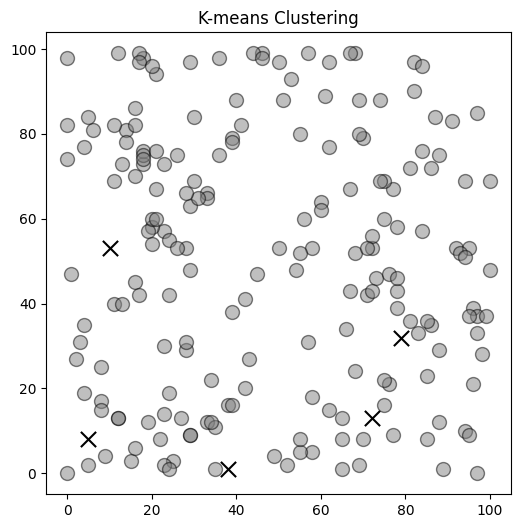

In [4]:
x, y, kx, ky = setup(NUMBER_OF_POINTS, NUMBER_OF_K)

print(f'x = {x}')
print(f'y = {y}')
print(f'kx = {kx}')
print(f'ky = {ky}')

定義不同群集的顏色

colors: [[[0.4, 0.9, 0.8]], [[0.6, 0.2, 0.2]], [[0.8, 0.1, 0.6]], [[0.4, 0.4, 1.0]], [[0.8, 0.5, 0.7]]]


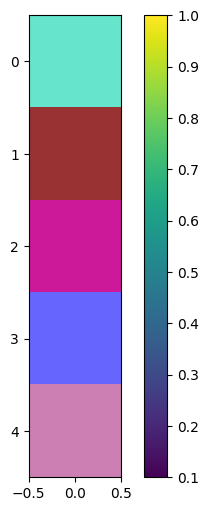

In [12]:
# Generate cluster colors
def generate_colors(number_of_K):
    colors = []
    for i in range(number_of_K):
        RGB_color = [[round(rd.random(), 1), round(rd.random(), 1), round(rd.random(), 1)]]
        colors.append(RGB_color)
    print(f'colors: {colors}')
    return colors

colors = generate_colors(NUMBER_OF_K)
# colors= [[[0.3, 0.6, 0.5]], [[0.8, 0.4, 0.6]], [[0.7, 0.5, 0.0]], [[0.6, 0.9, 0.7]], [[0.9, 0.8, 0.0]]]
plt.imshow(colors)
plt.colorbar()
plt.show()

In [18]:
start = True

def get_centroid(x_cluster, y_cluster):
    next_kx, next_ky = [], []
    for i in range(len(x_cluster)):
        next_kx.append(round(sum(x_cluster[i]) / len(x_cluster[i]),2))
        next_ky.append(round(sum(y_cluster[i]) / len(y_cluster[i]),2))
    # print(f'next_kx = {next_kx}, next_ky = {next_ky}')
    return next_kx, next_ky

def plot_scatter(x_cluster, y_cluster, next_kx, next_ky, iteration, colors):
    plt.clf()
    for i in range(len(x_cluster)):
        points = plt.scatter(x_cluster[i], y_cluster[i], s=100, c=colors[i], alpha=0.8 , edgecolors='black', label=f'Cluster {i+1}')
    centroids = plt.scatter(next_kx, next_ky, s=100, c='black', marker='x', label='Centroid')
    plt.legend(loc='upper right')
    plt.title(f'K-Means Clustering: Iteration {iteration}')
    plt.show()

# 迭代: 計算曼哈頓距離 -> 比較分群 -> 計算新的質心
def iteration(x, y):
    global iter_times
    global ITER_MAX
    if iter_times == ITER_MAX:
        print('Iteration max reached!')
        return
    iter_times += 1

    global kx, ky
    iter_dist = []
    for i in range(len(x)):
        dist = []
        for k in range(len(kx)):
            dist.append(mht_dist(x[i],y[i],kx[k],ky[k]))
        iter_dist.append(dist)
    # print(f'iter_distance = {iter_dist}')
    x_cluster = [[] for i in range(1, len(kx) + 1)]
    y_cluster = [[] for i in range(1, len(kx) + 1)]
    for i, list in enumerate(iter_dist):
        # print(f'Distance from P{i} to other K: {list}, min: {min(list)}, assign to cluster {list.index(min(list)) + 1}')
        x_cluster[list.index(min(list))].append(x[i])
        y_cluster[list.index(min(list))].append(y[i])
    # print(f'x_cluster = {x_cluster}')
    # print(f'y_cluster = {y_cluster}')
    next_kx, next_ky = get_centroid(x_cluster, y_cluster)
    # print(f'next_kx = {next_kx}, next_ky = {next_ky}')
    if next_kx == kx and next_ky == ky:
        print('Converged!')
        plot_scatter(x_cluster, y_cluster, kx, ky, iter_times, colors)
        global start
        start = False
        return
    else:
        kx, ky = next_kx, next_ky
    plot_scatter(x_cluster, y_cluster, next_kx, next_ky, iter_times, colors)
    print(f'Iteration {iter_times} completed!')
    return

def k_means_clustering():
    while start:
        clear_output(wait=True)
        iteration(x, y)
        time.sleep(1)

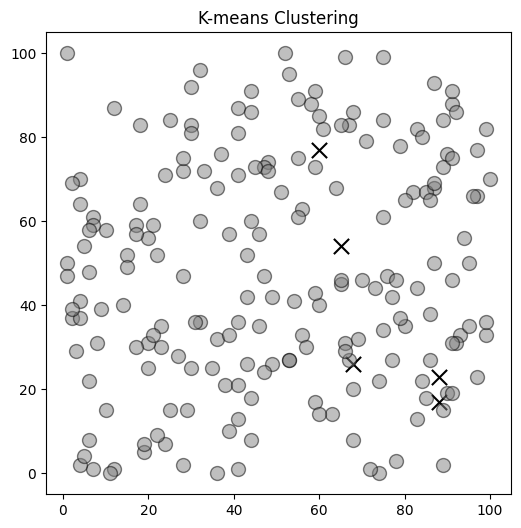

In [14]:
x, y, kx, ky = setup(NUMBER_OF_POINTS, NUMBER_OF_K)

Converged!


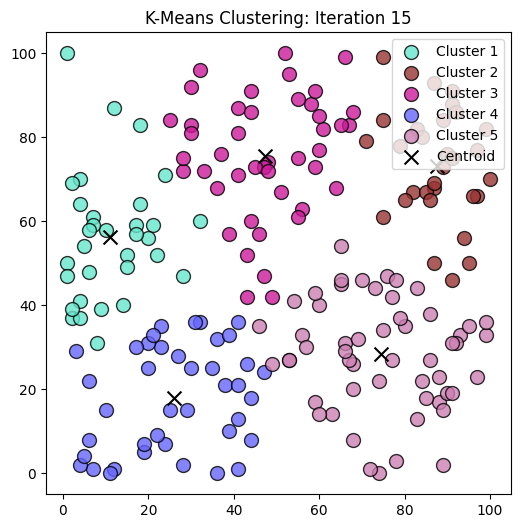

In [19]:
k_means_clustering()

K-Means 演算法有大量的變體，除了最傳統的 K-Means 演算法外，在其基礎上講述K-Means的優化變體方法。包括初始化優化K-Means++, 距離計算優化elkan K-Means算法和大數據情況下的優化Mini Batch K-Means算法。